In [1]:
from refit_loader.data_loader import REFIT_Loader

In [2]:
refit = REFIT_Loader()

Followings are the refit_loader configuration of your experiment..
{'DATA_FOLDER': 'data/refit/', 'DATA_TYPE': '.csv', 'README_FILE': 'refit_loader/REFIT_Readme.txt', 'REFIT_HOUSES': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]}

Loading specified buildings: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]
Parsing the readme file specified: refit_loader/REFIT_Readme.txt


# Load data for selected appliance and selected houses

In [3]:
%%time
kettle = refit.get_appliance_data(appliance="Kettle", houses=[1,2,3])

Loading data for appliance KETTLE ...
Appliance 'KETTLE' does not exist in house 1.
Fetching KETTLE data for House 2
Fetching KETTLE data for House 3
CPU times: total: 10.6 s
Wall time: 13 s


In [4]:
unsampled_kettle = kettle.data[3].copy(deep=True)
unsampled_kettle

,aggregate,kettle
time,,
2013-09-25 19:21:09,387.0,0.0
2013-09-25 19:21:16,386.0,0.0
2013-09-25 19:21:23,383.0,0.0
2013-09-25 19:21:30,388.0,0.0
2013-09-25 19:21:37,388.0,0.0
...,...,...
2015-06-02 10:55:14,2674.0,0.0
2015-06-02 10:55:21,2435.0,0.0
2015-06-02 10:55:28,2453.0,0.0


# Resample data 

In [5]:
%%time
kettle.resample(sampling_period='8s', fill_value=0.0, window_limit=3.0)

Resampling for house number:  2
Resampling for house number:  3
CPU times: total: 12.1 s
Wall time: 13.1 s


In [6]:
kettle.data[3]

,aggregate,kettle
time,,
2013-09-25 19:21:04,387.0,0.0
2013-09-25 19:21:12,386.5,0.0
2013-09-25 19:21:20,383.0,0.0
2013-09-25 19:21:28,388.0,0.0
2013-09-25 19:21:36,388.0,0.0
...,...,...
2015-06-02 10:55:04,2632.0,0.0
2015-06-02 10:55:12,2674.0,0.0
2015-06-02 10:55:20,2435.0,0.0


<AxesSubplot:xlabel='time'>

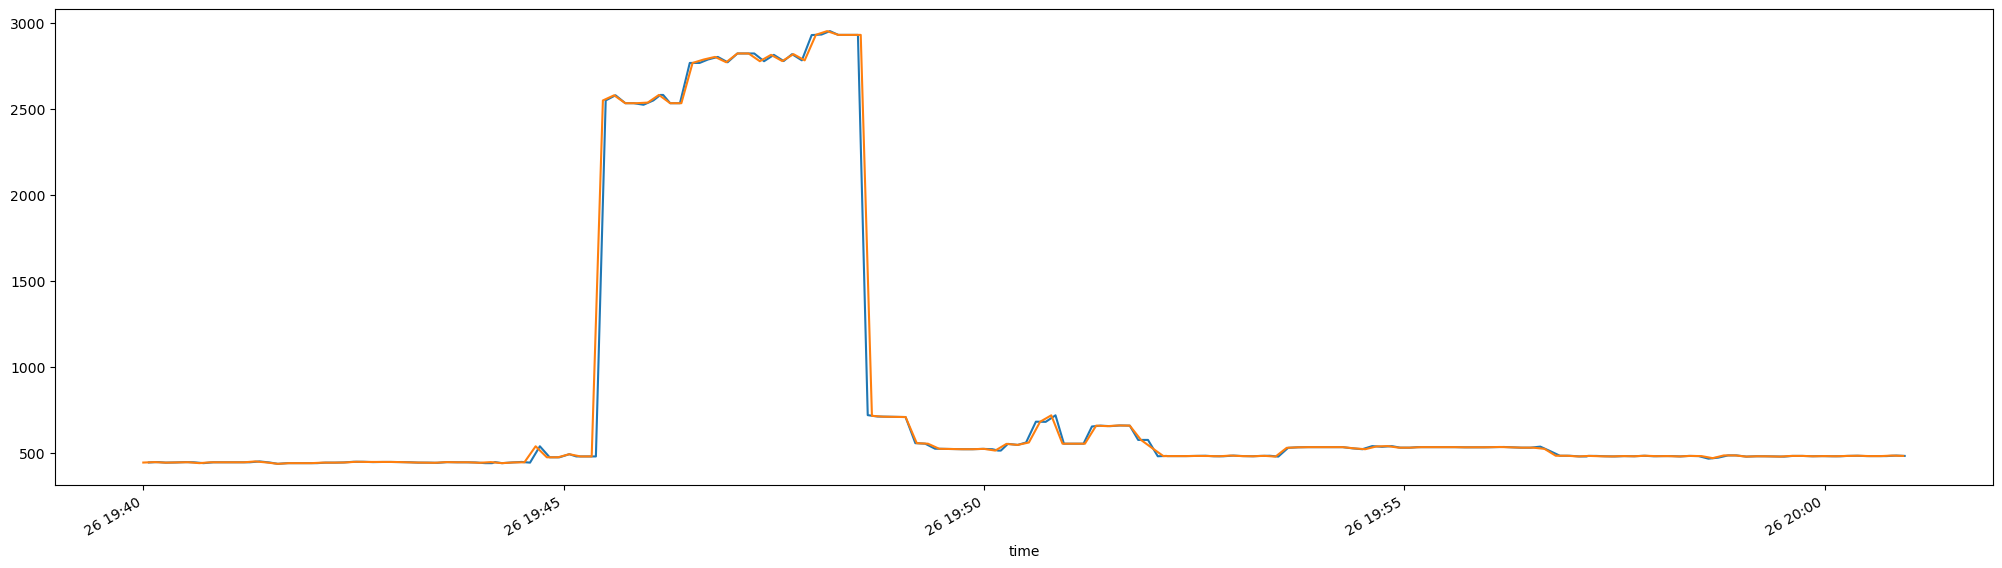

In [7]:
unsampled_kettle['aggregate']['2013-09-26 19:40': '2013-09-26 20:00'].plot(figsize=(25,7))
kettle.data[3]['aggregate']['2013-09-26 19:40': '2013-09-26 20:00'].plot(figsize=(25,7))

<AxesSubplot:xlabel='time'>

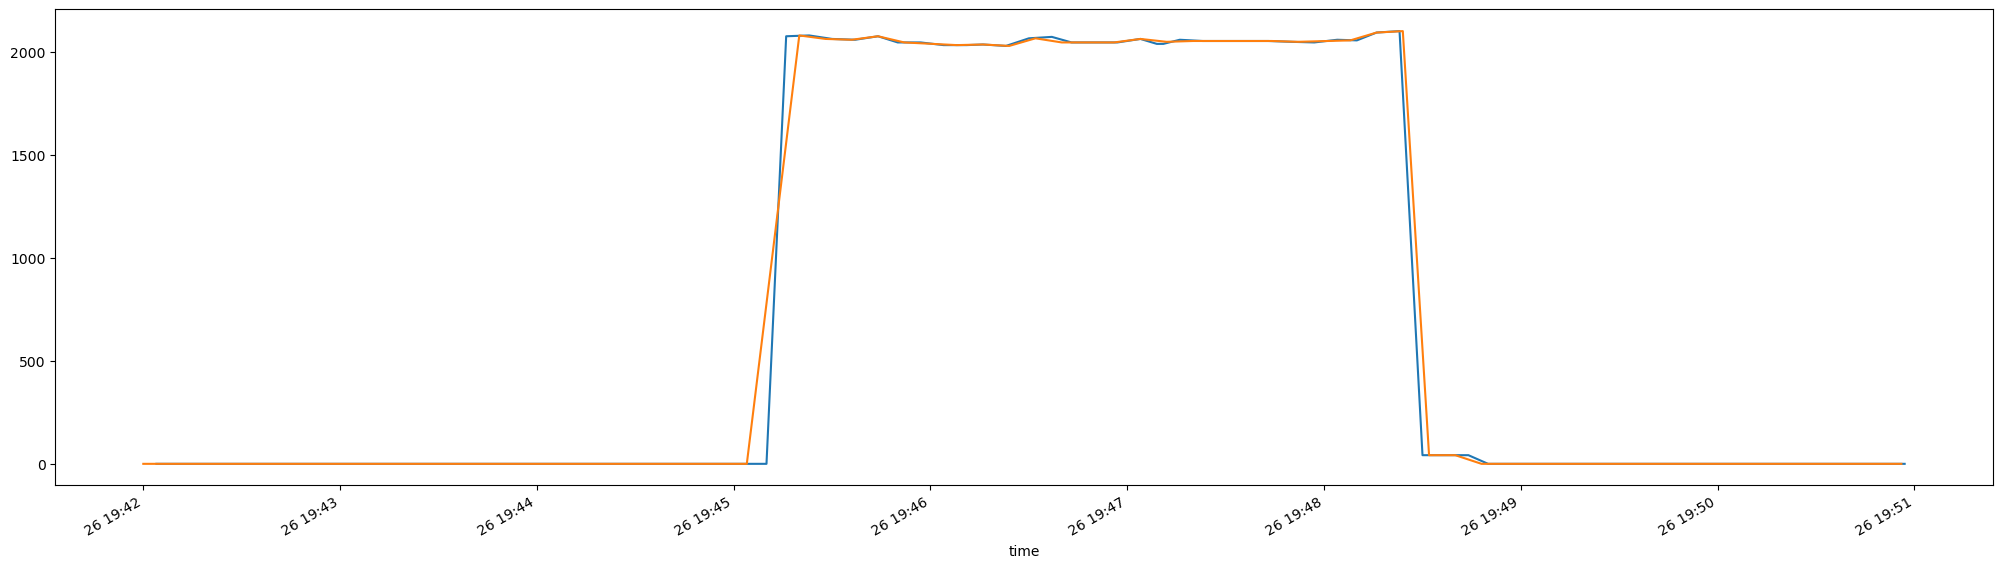

In [8]:
unsampled_kettle['kettle']['2013-09-26 19:42': '2013-09-26 19:50'].plot(figsize=(25,7))
kettle.data[3]['kettle']['2013-09-26 19:42': '2013-09-26 19:50'].plot(figsize=(25,7))